In [5]:
library(tidyverse)
library(tidymodels)

In [80]:
cleveland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/cleveland.data", col_names = FALSE, na = c("?"))
switzerland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/switzerland.data", col_names = FALSE, na = c("?"))
#cleveland <- read_csv("data/cleveland.data", col_names = FALSE, na = c("?"))
#switzerland <- read_csv("data/switzerland.data", col_names = FALSE, na = c("?"))

#cleveland
#switzerland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [96]:
cleveland_select <- cleveland |>
    select(X2, X5, X4, X8, X14)
switzerland_select <- switzerland |>
    select(X2, X5, X4, X8, X14)
column_names <- c("sex", "serum_cholesterol", "resting_blood_pressure", "max_heart_rate", "heart_disease_present")
colnames(cleveland_select) <- column_names
colnames(switzerland_select) <- column_names

cleveland_select$heart_disease_present[cleveland_select$heart_disease_present > 1] <- 1
switzerland_select$heart_disease_present[switzerland_select$heart_disease_present > 1] <- 1

all_places <- rbind(cleveland_select, switzerland_select)
all_places_select <- mutate(all_places, sex = as_factor(sex), heart_disease_present = as_factor(heart_disease_present))





In [97]:
set.seed(77777) 
places_split <- initial_split(all_places_select, prop = 0.75, strata = heart_disease_present)
places_training <- training(places_split) 
places_testing <- testing(places_split) 



In [99]:
avg <-  places_training |>
    select(serum_cholesterol, resting_blood_pressure) |>
    map_df(mean) |>
    mutate(serum_cholesterol_avg = serum_cholesterol, resting_bp_avg = resting_blood_pressure) |>
    select(serum_cholesterol_avg, resting_bp_avg)

count0 <- places_training |>
    filter(heart_disease_present == 0) |>
    count() |>
    pull()
count1 <- places_training |>
    filter(heart_disease_present == 1) |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_people_no_disease = count0) |>
    mutate(num_people_w_disease = count1)
countM <- places_training |>
    filter(sex == 1) |>
    count() |>
    pull()
countF <- places_training |>
    filter(sex == 0) |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_females = countF, num_males = countM)
#cleveland_training
avg
#count

serum_cholesterol_avg,resting_bp_avg,num_people_no_disease,num_people_w_disease,num_females,num_males
<dbl>,<dbl>,<int>,<int>,<int>,<int>
178.7179,NA,129,190,73,246


[1] "sex"                    "chest_pain_type"        "serum_cholesterol"     
[4] "resting_blood_pressure" "max_heart_rate"         "heart_disease_present"

Warning message:
“Removed 2 rows containing missing values (geom_point).”


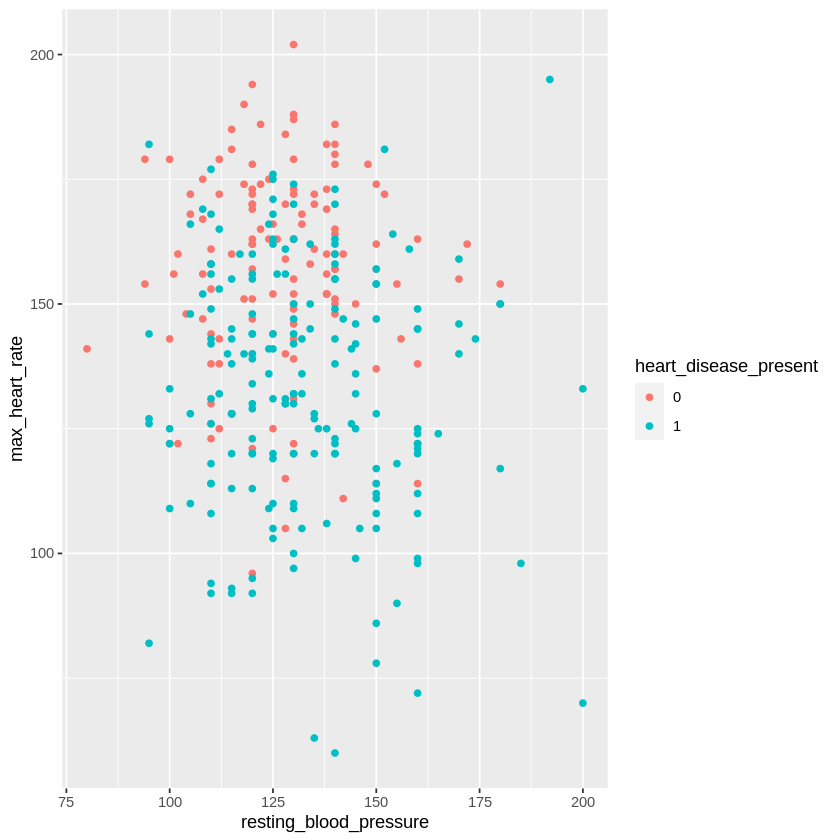

In [101]:
#all_places
#cleveland <- mutate(cleveland, X14 = as_factor(X14))
gah <- ggplot(places_training, aes(x = resting_blood_pressure, y = max_heart_rate, colour = heart_disease_present)) +
    geom_point()
gah